In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('EnergyEfficiencyData2012_data.csv')

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 
X1	Relative Compactness 

X2	Surface Area 
X3	Wall Area 
X4	Roof Area 
X5	Overall Height 
X6	Orientation 
X7	Glazing Area 
X8	Glazing Area Distribution 
y1	Heating Load 
y2	Cooling Load

http://archive.ics.uci.edu/ml/datasets/Energy+efficiency

In [19]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28


In [20]:
data = data[['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'Y2']]

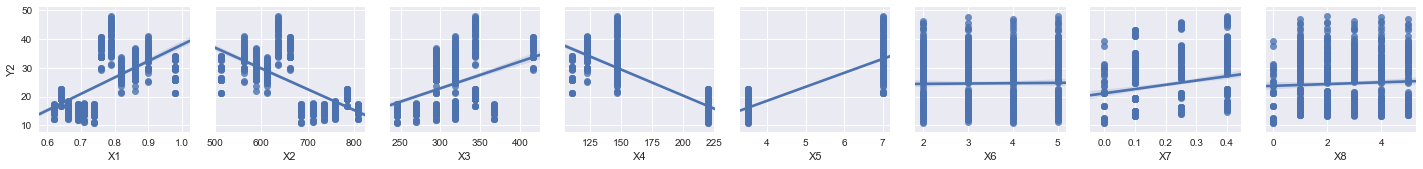

In [21]:
# Y2 = Cooling load (Y2 is the response tha twe are aiming to predict with our linear model)
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars = ['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8'], y_vars = 'Y2', kind = 'reg' )

In [74]:
X = data[['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8']]

y = data['Y2']

y = y.loc[:767]

In [75]:
X.loc[767] #All Null vales after the 767th row
X = X.loc[:767]

In [76]:
print(X.shape)
print(y.shape)


(768, 8)
(768,)


In [77]:
X.tail()

,X1,X2,X3,X4,X5,X6,X7,X8
763,0.64,784.0,343.0,220.5,3.5,5.0,0.4,5.0
764,0.62,808.5,367.5,220.5,3.5,2.0,0.4,5.0
765,0.62,808.5,367.5,220.5,3.5,3.0,0.4,5.0
766,0.62,808.5,367.5,220.5,3.5,4.0,0.4,5.0
767,0.62,808.5,367.5,220.5,3.5,5.0,0.4,5.0


In [78]:
X.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
dtype: object

In [79]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [80]:
#select and instantiate model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() 

In [81]:
#fit
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
#predict
y_pred = linreg.predict(X_test)

In [83]:
from sklearn import metrics
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.00185652169


In [84]:
#Let's test it out with out of sample data 
print(X_test.sort_index())

       X1     X2     X3      X4   X5   X6   X7   X8
4    0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0
6    0.90  563.5  318.5  122.50  7.0  4.0  0.0  0.0
14   0.82  612.5  318.5  147.00  7.0  4.0  0.0  0.0
15   0.82  612.5  318.5  147.00  7.0  5.0  0.0  0.0
18   0.79  637.0  343.0  147.00  7.0  4.0  0.0  0.0
27   0.74  686.0  245.0  220.50  3.5  5.0  0.0  0.0
30   0.71  710.5  269.5  220.50  3.5  4.0  0.0  0.0
36   0.66  759.5  318.5  220.50  3.5  2.0  0.0  0.0
37   0.66  759.5  318.5  220.50  3.5  3.0  0.0  0.0
38   0.66  759.5  318.5  220.50  3.5  4.0  0.0  0.0
47   0.62  808.5  367.5  220.50  3.5  5.0  0.0  0.0
50   0.98  514.5  294.0  110.25  7.0  4.0  0.1  1.0
58   0.86  588.0  294.0  147.00  7.0  4.0  0.1  1.0
70   0.76  661.5  416.5  122.50  7.0  4.0  0.1  1.0
72   0.74  686.0  245.0  220.50  3.5  2.0  0.1  1.0
78   0.71  710.5  269.5  220.50  3.5  4.0  0.1  1.0
86   0.66  759.5  318.5  220.50  3.5  4.0  0.1  1.0
92   0.62  808.5  367.5  220.50  3.5  2.0  0.1  1.0
101  0.90  5

In [85]:
#we see how row 0 from the X dataframe was not in the sample, so let's use that
#type(X.loc[0])
X_new = pd.DataFrame(data = [X.loc[0]])

In [86]:
#predict y for X_new - expected value of y_pred(i.e Y2[0] from original data set = 21.33)
y_pred = linreg.predict(X_new)
print(y_pred)

[ 25.64613606]
